# Test Image Data Augmentation

## Mount Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/Capstone/C501/ModelPreparation/Dataset/Test_Dataset/Ducky_Chicken

/content/gdrive/MyDrive/Capstone/C501/ModelPreparation/Dataset/Test_Dataset/Ducky_Chicken


In [ ]:
%ls

Test1.jpg                  Test_Ducky_Chicken_19.jpg  Test_Ducky_Chicken_35.jpg
Test2.jpg                  Test_Ducky_Chicken_1.jpg   Test_Ducky_Chicken_36.jpg
Test3.jpg                  Test_Ducky_Chicken_20.jpg  Test_Ducky_Chicken_37.jpg
Test4.jpg                  Test_Ducky_Chicken_21.jpg  Test_Ducky_Chicken_38.jpg
Test5.jpg                  Test_Ducky_Chicken_22.jpg  Test_Ducky_Chicken_39.jpg
Test6.jpg                  Test_Ducky_Chicken_23.jpg  Test_Ducky_Chicken_3.jpg
Test7.jpg                  Test_Ducky_Chicken_24.jpg  Test_Ducky_Chicken_40.jpg
Test8.jpg                  Test_Ducky_Chicken_25.jpg  Test_Ducky_Chicken_41.jpg
Test9.jpg                  Test_Ducky_Chicken_26.jpg  Test_Ducky_Chicken_42.jpg
Test_Ducky_Chicken_10.jpg  Test_Ducky_Chicken_27.jpg  Test_Ducky_Chicken_43.jpg
Test_Ducky_Chicken_11.jpg  Test_Ducky_Chicken_28.jpg  Test_Ducky_Chicken_44.jpg
Test_Ducky_Chicken_12.jpg  Test_Ducky_Chicken_29.jpg  Test_Ducky_Chicken_4.jpg
Test_Ducky_Chicken_13.jpg  Test_Ducky_Chic

In [ ]:
drive_dataset_dir = "/content/gdrive/MyDrive/Capstone/C501/ModelPreparation/Dataset/Test_Dataset/Ducky_Chicken/"

## Import Depedencies

In [ ]:
import os
from os import path
import pathlib
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

import random
import shutil
import io
import imageio
import glob
import scipy.misc
import cv2
import h5py
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

%matplotlib inline

## Define Helper Function

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

## Create Augmented Data

In [ ]:
%cd /content

/content


In [ ]:
len(os.listdir(drive_dataset_dir))

53

In [ ]:
!mkdir /content/Test
!mkdir /content/Test/Ducky_Chicken

mkdir: cannot create directory ‘/content/Test’: File exists


In [ ]:
# Move image dataset to train directory
test_image_dir = '/content/Test'
image_dir = '/content/Test/Ducky_Chicken'
for i in range(1, len(os.listdir(drive_dataset_dir)) - 8):
  image_extra_dir = drive_dataset_dir + "Test_Ducky_Chicken_" + str(i) + ".jpg"
  shutil.copy(image_extra_dir, image_dir)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    fill_mode = 'nearest',
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range= 45,
    zoom_range = 0.1,
    rescale=1./255
)

In [ ]:
# If you want to create new augmented images
#%rm -rf '/content/Augmented'

In [ ]:
# Create augmented data dir
if path.exists('/content/Augmented') == False:
  os.mkdir('/content/Augmented')

In [ ]:
augmented_dir = '/content/Augmented'
test_generator = datagen.flow_from_directory(
    test_image_dir,
    target_size = (896, 896),
    color_mode ='rgb',
    #classes = ['Three_Ducky'],
    #class_mode ='binary',
    batch_size = 5,
    seed = 42,
    save_to_dir= augmented_dir,
    save_prefix='augmented',
    save_format='jpg',
    subset=None,
    interpolation='nearest'
)

Found 44 images belonging to 2 classes.


In [ ]:
# Generate batch times i images
for i in range(9):
    test_generator.next()

In [ ]:
# Check number of augmented images
len(os.listdir(augmented_dir))

44

## Visualize Augmented Images

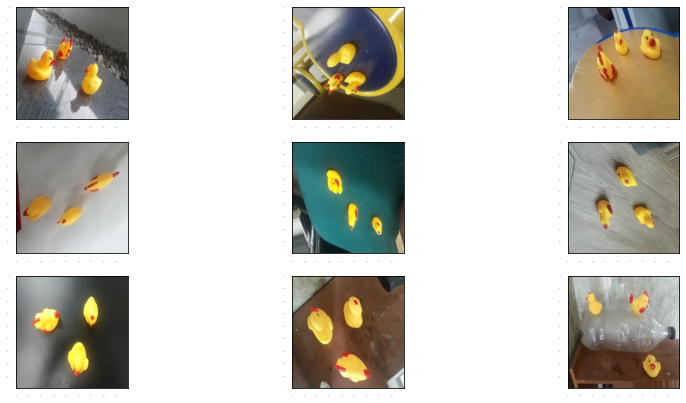

In [ ]:
# Load images and visualize
train_images_np = []
#number_of_train_images = len(os.listdir(augmented_dir))
number_of_train_images = 9
for i in range(0, number_of_train_images):
  image_path = os.path.join(augmented_dir, os.listdir(augmented_dir)[i])
  train_images_np.append(load_image_into_numpy_array(image_path))

plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

for idx, train_image_np in enumerate(train_images_np[0:9]):
  plt.subplot(3, 3, idx+1)
  plt.imshow(train_image_np)
plt.show()

## Zip Augmented Images Folder

In [ ]:
!zip -r /content/augmented_images.zip /content/Augmented

  adding: content/Augmented/ (stored 0%)
  adding: content/Augmented/augmented_10_6496229.jpg (deflated 0%)
  adding: content/Augmented/augmented_26_2637521.jpg (deflated 1%)
  adding: content/Augmented/augmented_18_988852.jpg (deflated 1%)
  adding: content/Augmented/augmented_39_7052537.jpg (deflated 5%)
  adding: content/Augmented/augmented_2_3284956.jpg (deflated 1%)
  adding: content/Augmented/augmented_6_3386996.jpg (deflated 0%)
  adding: content/Augmented/augmented_0_2574277.jpg (deflated 3%)
  adding: content/Augmented/augmented_32_9639851.jpg (deflated 1%)
  adding: content/Augmented/augmented_36_3366612.jpg (deflated 1%)
  adding: content/Augmented/augmented_4_2013487.jpg (deflated 0%)
  adding: content/Augmented/augmented_33_6757900.jpg (deflated 3%)
  adding: content/Augmented/augmented_40_7541565.jpg (deflated 4%)
  adding: content/Augmented/augmented_17_8552588.jpg (deflated 1%)
  adding: content/Augmented/augmented_13_5427848.jpg (deflated 0%)
  adding: content/Augmente